**WHY SOM?**
According to the literature, SOM is a generic methodology, which has been applied in many classical modeling tasks such as **visualization** of a high dimensional space, **clustering and classification**, **prediction** and function approximation and many other tasks. 

There are different interpretations for SOM algorithm. 
One can compare SOM with other **clustering methods** or to compare it with space transformation and feature extraction methods such as Principal Component Analysis (PCA).


In [3]:
import pandas as pd
import numpy as np
from sompy import SOMFactory
import random
import joblib
import glob
import matplotlib.pyplot as plt
import matplotlib
from sompy.visualization.plot_tools import plot_hex_map

CACHEDIR=/Users/ccy/.matplotlib
Using fontManager instance from /Users/ccy/.matplotlib/fontlist-v330.json


# color data clustering

A little example with 3d color data

## Train a SOM with randomly generated colors, which are represented as 3d arrays

In [5]:
data = np.random.random([10000,3])

In [6]:
data[1]

array([0.29662666, 0.86881004, 0.3014478 ])

Website to check color scheme
https://convertingcolors.com/rgb-color-125_125_125.html?search=RGB(125,%20125,%20125)

In [7]:
data

array([[0.70410403, 0.25006004, 0.32826943],
       [0.29662666, 0.86881004, 0.3014478 ],
       [0.31718399, 0.9028948 , 0.20634623],
       ...,
       [0.63756011, 0.5628158 , 0.30758542],
       [0.03188263, 0.06992268, 0.6326079 ],
       [0.4297977 , 0.89660478, 0.19144488]])

In [8]:
data.shape

(10000, 3)

In [9]:
data[0:9:1].reshape([3,3,3])

array([[[0.70410403, 0.25006004, 0.32826943],
        [0.29662666, 0.86881004, 0.3014478 ],
        [0.31718399, 0.9028948 , 0.20634623]],

       [[0.28661086, 0.26349656, 0.88002206],
        [0.99866286, 0.07528551, 0.64109147],
        [0.91216419, 0.17649467, 0.09291987]],

       [[0.6224002 , 0.64020961, 0.03070845],
        [0.90858563, 0.31104691, 0.3029486 ],
        [0.37106256, 0.11629831, 0.01207579]]])

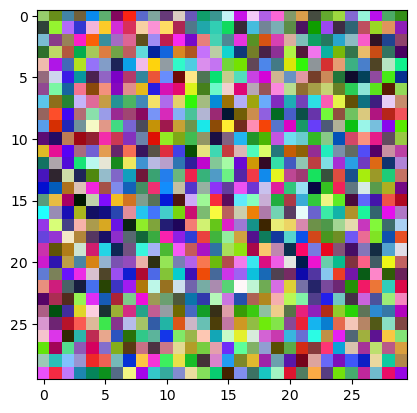

In [11]:
plt.imshow(np.asarray(random.sample(list(data),900)).reshape([30,30,3]))
plt.show()

## Train a 30x30 size SOM

Initialize a SOM

In [17]:
som = SOMFactory().build(data,mapsize=[30,30],normalization="var",initialization="random")

Train a SOM

In [44]:
%%time
som.train(n_job=3,verbose=False,train_rough_len=3,train_finetune_len=10)

CPU times: user 2.74 s, sys: 2.28 s, total: 5.02 s
Wall time: 893 ms


## uncover the SOM matrix

In [45]:
matrix = som.codebook.matrix
matrix

array([[-1.428659,  0.382792,  0.831037],
       [-1.387704,  0.2362  ,  0.765185],
       [-1.313003,  0.032599,  0.678255],
       ...,
       [ 0.978556,  1.451596, -1.032466],
       [ 0.781597,  1.447094, -0.788068],
       [ 0.63733 ,  1.453512, -0.597846]])

In [46]:
matrix.shape

(900, 3)

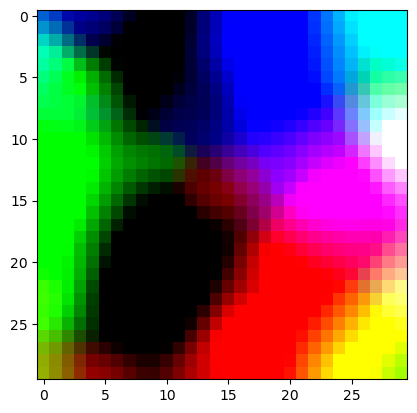

In [47]:
plt.imshow(matrix.reshape([30,30,3]))
plt.show()

<img src="visulized SOM.png" width="700" align="left"/>

## discover the BMUs for each data

In [14]:
som.project_data(data)

/Users/ccy/opt/anaconda3/envs/som/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([384, 837, 154, ..., 656, 767, 110])

In [15]:
indexes = som.project_data(data)
indexes[0:100:1]

/Users/ccy/opt/anaconda3/envs/som/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([384, 837, 154, 329, 399, 765, 894, 318,  92, 864, 890, 609,   1,
       472, 781, 883, 466, 769, 670, 315, 528, 444, 541, 431, 370, 236,
       217, 685, 801, 431, 299, 614, 885, 604, 635, 510, 847, 574, 639,
       123, 732, 676,  99, 370, 111, 582, 139, 791, 488, 249, 370, 479,
       603, 105,  30, 101, 778, 723, 200,  19, 613, 650,  42,  39, 312,
       270,  20, 852, 835, 468,  75, 817, 270,  51, 155, 602, 431, 628,
       238, 225, 351, 895, 545, 223, 161, 526, 585, 711, 403, 539, 864,
       761,  27, 359, 617, 174,  64, 505, 873, 515])

<img src="somunitindex.png" width="700" align="left"/>

How a data and its som index are connected?

In [194]:
data[0]

array([0.31670469, 0.19979342, 0.52404031])

In [195]:
indexes[0]

384

## visulize where a data is assigned to the SOM

In [185]:
check = 1

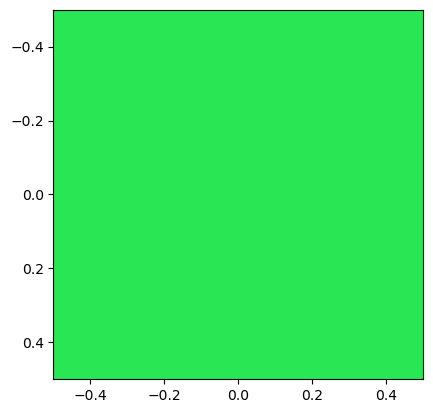

In [186]:
plt.imshow(data[check].reshape([1,1,3]))

<img src="colored som.png" width="400" align="left"/>

In [187]:
indexes[check]

837

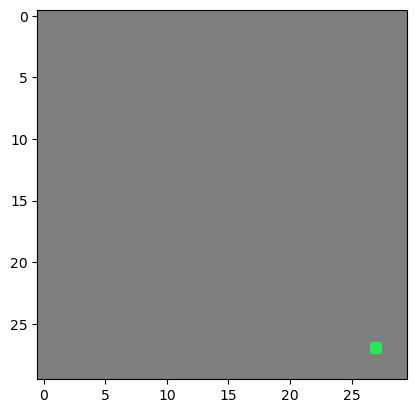

In [188]:
grids=[]
for i in range(900):
    grids.append([0.5,0.5,0.5])
grids[indexes[check]] = data[check]
plt.imshow(np.asarray(grids).reshape([30,30,3]))

## show the friends of colors which are aligned in the same BMU

In [189]:
units = []
for i in range(900):
    unit = []
    for j in range(len(indexes)):
        if indexes[j]==i:
            unit.append(data[j])
    units.append(unit)

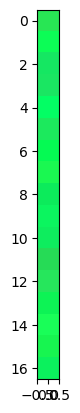

In [175]:
plt.imshow(np.asarray(units[837]).reshape([len(units[837]),1,3]))

Another example of a data - red color

In [190]:
check = 116

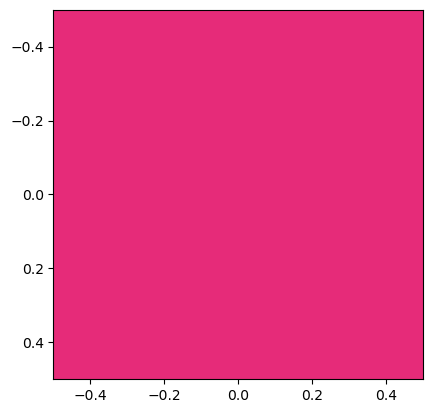

In [191]:
plt.imshow(data[check].reshape([1,1,3]))

<img src="colored som.png" width="400" align="left"/>

In [192]:
indexes[check]

840

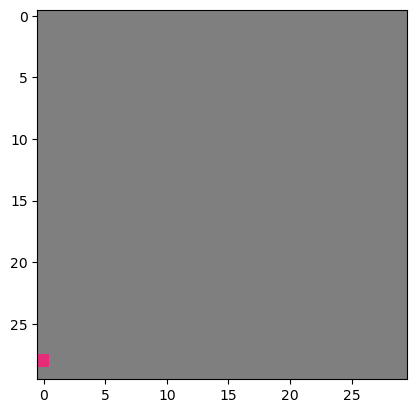

In [196]:
grids=[]
for i in range(900):
    grids.append([0.5,0.5,0.5])
grids[indexes[check]] = data[check]
plt.imshow(np.asarray(grids).reshape([30,30,3]))

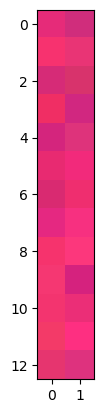

In [197]:
plt.imshow(np.asarray(units[indexes[check]]).reshape([int(len(units[indexes[check]])/2),2,3]))

# The airflight cancellation relevance study with SOM

analyze and visulize the potential relevance with flight cancellations

In [48]:
df = pd.read_csv("./DelayedFlights.csv")

In [49]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


**Fields description**
__________________________
1.	**Year**:	2008
2.	**Month**:	1-12
3.	**DayofMonth**:	1-31
4.	**DayOfWeek**:	1 (Monday) - 7 (Sunday)
5.	**DepTime**:	actual departure time (local, hhmm)
6.	**CRSDepTime**:	scheduled departure time (local, hhmm)
7.	**ArrTime**:	actual arrival time (local, hhmm)
8.	**CRSArrTime**:	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**:	unique carrier code
10.	**FlightNum**:	flight number
11.	**TailNum**:	plane tail number
12.	**ActualElapsedTime**:	in minutes
13.	**CRSElapsedTime**:	in minutes
14.	**AirTime**:	in minutes
15.	**ArrDelay**:	arrival delay, in minutes
16.	**DepDelay**:	departure delay, in minutes
17.	**Origin**:	origin IATA airport code
18.	**Dest**:	destination IATA airport code
19.	**Distance**:	in miles
20.	**TaxiIn**:	taxi in time, in minutes
21.	**TaxiOut**:	taxi out time in minutes
22.	**Cancelled**:	was the flight cancelled?
23.	**CancellationCode**:	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**:	1 = yes, 0 = no
25.	**CarrierDelay**:	in minutes
26.	**WeatherDelay**:	in minutes
27.	**NASDelay**:	National Air System delay in minutes
28.	**SecurityDelay**	in minutes
29.	**LateAircraftDelay**	in minutes

In [51]:
df = df[["Month","DayofMonth", "DayOfWeek","DepTime", "AirTime",
         "Distance", "SecurityDelay","WeatherDelay", "NASDelay", "CarrierDelay",
         "ArrDelay", "DepDelay", "LateAircraftDelay", "Cancelled"]]

In [52]:
# fill the NaN with 0
df = df.fillna(0)

In [53]:
# select features for SOM to cluster
clustering_vars = ["Month", "DayofMonth", "DepTime", "AirTime", 
                   "LateAircraftDelay", "DepDelay", "ArrDelay", "CarrierDelay"]

In [54]:
# read data
data = df[clustering_vars].values

In [55]:
names = clustering_vars

In [56]:
names

['Month',
 'DayofMonth',
 'DepTime',
 'AirTime',
 'LateAircraftDelay',
 'DepDelay',
 'ArrDelay',
 'CarrierDelay']

In [57]:
df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,AirTime,Distance,SecurityDelay,WeatherDelay,NASDelay,CarrierDelay,ArrDelay,DepDelay,LateAircraftDelay,Cancelled
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.078083e+02,7.656862e+02,5.805836e-02,2.385512e+00,9.675607e+00,1.235367e+01,4.201714e+01,4.318518e+01,1.629374e+01,3.268348e-04
std,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,6.886184e+01,5.744797e+02,1.623934e+00,1.734036e+01,2.808958e+01,3.613493e+01,5.672935e+01,5.340250e+01,3.585904e+01,1.807562e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,5.800000e+01,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,9.000000e+01,6.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.400000e+01,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.370000e+02,9.980000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+01,5.500000e+01,5.300000e+01,1.800000e+01,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,1.091000e+03,4.962000e+03,3.920000e+02,1.352000e+03,1.357000e+03,2.436000e+03,2.461000e+03,2.467000e+03,1.316000e+03,1.000000e+00


In [87]:
som = SOMFactory().build(data, mapsize=[20,20],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa")

In [88]:
%%time
som.train(n_job=4, verbose=False, train_rough_len=10, train_finetune_len=30)

CPU times: user 12min, sys: 13min 38s, total: 25min 39s
Wall time: 4min 58s


In [13]:
models_pool = glob.glob("./models/model*")
errors=[]
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

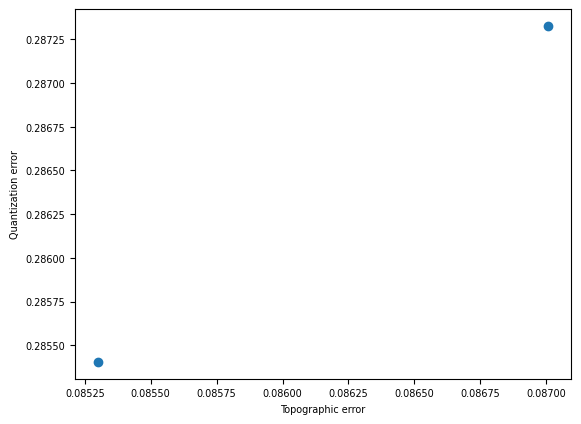

In [43]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [44]:
selected_model = 1
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.15118512483232288
 Quantization error = 0.3417101184666735


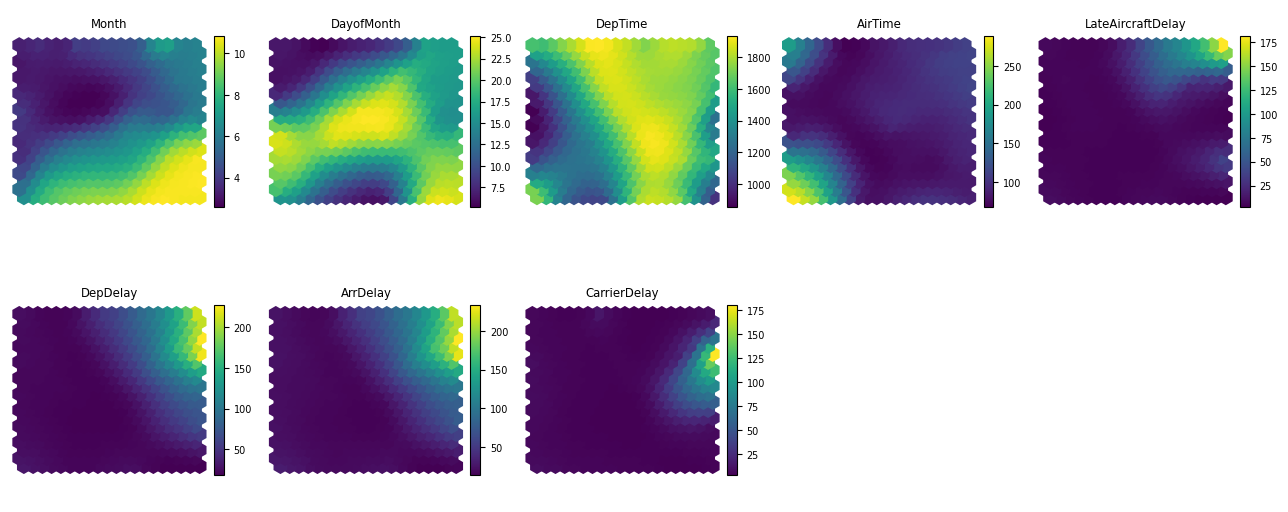

In [89]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=5, which_dim="all", denormalize=True)
plt.show()

In [93]:
df.columns

Index(['Month', 'DayofMonth', 'DepTime', 'AirTime', 'LateAircraftDelay',
       'DepDelay', 'ArrDelay', 'CarrierDelay', 'DayOfWeek', 'Distance',
       'SecurityDelay', 'WeatherDelay', 'NASDelay', 'Cancelled', 'bmus'],
      dtype='object')

In [94]:
# Addition of some exogeneous variables to the map
exogeneous_vars = [c for c in df.columns if not c in clustering_vars+["Cancelled", "bmus"]] 

In [92]:
df["bmus"] = som.project_data(data)
df.shape

/Users/ccy/opt/anaconda3/envs/som/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(1936758, 15)

In [95]:
df = df[clustering_vars + exogeneous_vars + ["Cancelled"] + ["bmus"]]

In [96]:
empirical_codebook=df.groupby("bmus").mean().values

In [97]:
empirical_codebook.shape

(400, 14)

In [98]:
som.codebook.mapsize + [empirical_codebook.shape[-1]]

[20, 20, 14]

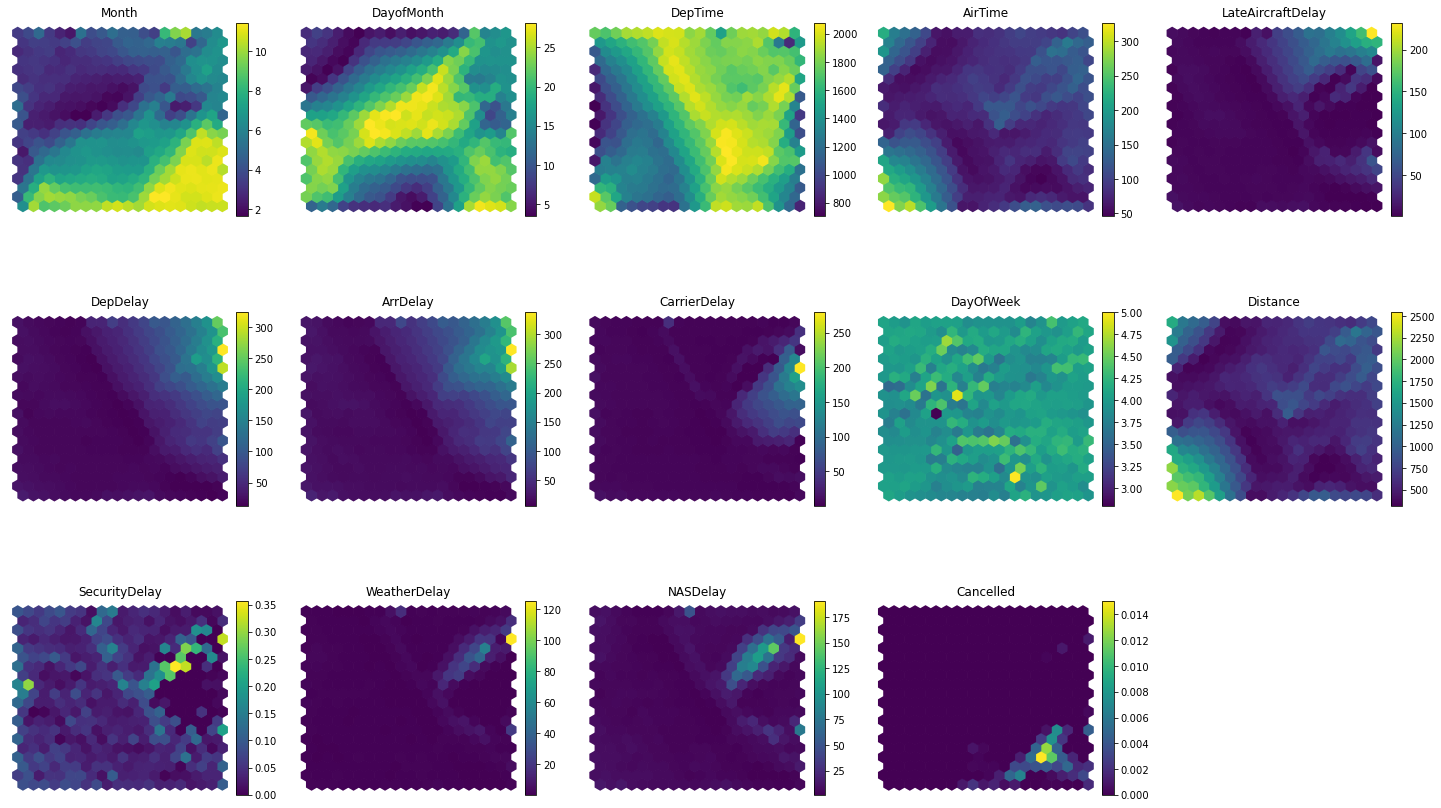

In [99]:
matplotlib.rcParams.update({'font.size': 10})
plot_hex_map(empirical_codebook.reshape(som.codebook.mapsize + [empirical_codebook.shape[-1]]), 
             titles=df.columns[:-1], shape=[4, 5], colormap=None)
plt.show()

Conclusion:

* cancellation is related to Month. Late months are more likely to have cancelled flight

* ....


* Normalization?

* optimization radius

Applications in architecture

In [42]:
%%time
# TBD
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study
for i in range(2):
    som = SOMFactory().build(data, mapsize=[20,30],
                            normalization = 'var', initialization='random', component_names=names,lattice="hexa")
    som.train(n_job=4, verbose=False, train_rough_len=3, train_finetune_len=10)
    joblib.dump(som, "./models/model_{}.joblib".format(i))

CPU times: user 6min 54s, sys: 8min 24s, total: 15min 19s
Wall time: 2min 37s
